SET100 Data: Feature Set 01

2015-2019

193716 rows × 9 columns  

1304 rows × 150 columns


Found 129 stocks with price observations 1335.

In [1]:
import sys, os, os.path
if not 'EXPERIMENT_HOME' in os.environ: # Configure local paths if not already defined
    ML_HOME = os.path.abspath(os.path.join("/home/jovyan", "ml_home")) # ML workspace
    EXPERIMENT_HOME = os.path.abspath(os.path.join(ML_HOME, "..")) # Experiment workspace
    DATA_HOME = os.path.abspath(os.path.join(EXPERIMENT_HOME,"dataset")) # Dataset location
    os.environ["EXPERIMENT_HOME"] = EXPERIMENT_HOME
    os.environ["DATA_HOME"] = DATA_HOME
    sys.path.insert(0, EXPERIMENT_HOME)
    sys.path.insert(0, ML_HOME) # Add to path so can load our library
    os.chdir(EXPERIMENT_HOME) # Change working directory to experiment workspace
print("Experiment Home: ", os.path.abspath(os.curdir), "; Data Home:", DATA_HOME)

Experiment Home:  /home/jovyan ; Data Home: /home/jovyan/dataset


In [2]:
from datetime import datetime
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import xlrd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
os.chdir("/home/jovyan/dataset/set100.data")
stocks = pd.read_csv('_directory.csv', index_col=0)
print("Stocks count:", len(stocks))
stocks.tail()

Stocks count: 150


,company_name,industry,sector,symbol
ticker,,,,
VIBHA,VIBHAVADI MEDICAL CENTER PUBLIC COMPANY LIMITED,Services,Health Care Services,VIBHA
VNG,VANACHAI GROUP PUBLIC COMPANY LIMITED,Property & Construction,Construction Materials,VNG
WHA,WHA CORPORATION PUBLIC COMPANY LIMITED,Property & Construction,Property Development,WHA
WHAUP,WHA UTILITIES AND POWER PUBLIC COMPANY LIMITED,Resources,Energy & Utilities,WHAUP
WORK,WORKPOINT ENTERTAINMENT PUBLIC COMPANY LIMITED,Services,Media & Publishing,WORK


In [4]:
period_start='2015-01-01'
period_end='2019-12-31'
series = {}
for s in stocks.symbol.values:
    df = pd.read_csv("%s.csv" % s, index_col=0)
    # Add column ticker
    df.loc[:,('Date')] = df.index
    df['Ticker'] = s
    
    # Add sector column
    sector = stocks[stocks['symbol']==s].sector.values[0]
    df['Sector'] = sector

    # Add industry column
    industry = stocks[stocks['symbol']==s].industry.values[0]
    df['Industry'] = industry
    
    # Add to dictionary
    series[s] = df[period_start:period_end]

In [5]:
# Select single stock series for analysis    
ticker = "SCB"
df = series[ticker]
df.index = pd.to_datetime(df.index)
df

,Price,MV,VA,VO,DY,Date,Ticker,Sector,Industry
Date,,,,,,,,,
2015-01-01,182.0,617764.2,NaN,NaN,2.88,2015-01-01,SCB,Banking,Financials
2015-01-02,182.0,617764.2,NaN,NaN,2.88,2015-01-02,SCB,Banking,Financials
2015-01-05,179.0,607581.3,1035117.0,5752.3,2.93,2015-01-05,SCB,Banking,Financials
2015-01-06,175.0,594004.1,1822522.0,10431.0,3.00,2015-01-06,SCB,Banking,Financials
2015-01-07,178.0,604186.9,792808.3,4456.9,2.95,2015-01-07,SCB,Banking,Financials
...,...,...,...,...,...,...,...,...,...
2019-12-25,119.5,405771.6,457841.1,3841.8,4.60,2019-12-25,SCB,Banking,Financials
2019-12-26,119.0,404073.9,630049.9,5295.4,4.62,2019-12-26,SCB,Banking,Financials
2019-12-27,119.5,405771.6,667488.9,5586.6,4.60,2019-12-27,SCB,Banking,Financials


In [6]:
# Stack dataframes together
# https://stackoverflow.com/questions/29351840/stack-two-pandas-data-frames
rows = []
for k, d in series.items():
    rows.append(d)
df = pd.concat(rows, ignore_index=True)
df

,Price,MV,VA,VO,DY,Date,Ticker,Sector,Industry
0,4.30,20855.00,NaN,NaN,0.00,2015-01-01,AAV,Transportation & Logistics,Services
1,4.30,20855.00,NaN,NaN,0.00,2015-01-02,AAV,Transportation & Logistics,Services
2,4.30,20855.00,71287.9,16567.4,0.00,2015-01-05,AAV,Transportation & Logistics,Services
3,4.54,22018.99,265539.0,59230.2,0.00,2015-01-06,AAV,Transportation & Logistics,Services
4,4.58,22212.99,110609.1,24048.5,0.00,2015-01-07,AAV,Transportation & Logistics,Services
...,...,...,...,...,...,...,...,...,...
193711,13.60,6005.22,25806.5,1918.2,3.31,2019-12-25,WORK,Media & Publishing,Services
193712,13.90,6137.69,26514.5,1907.0,3.24,2019-12-26,WORK,Media & Publishing,Services
193713,14.10,6226.00,22389.9,1587.2,3.19,2019-12-27,WORK,Media & Publishing,Services
193714,14.00,6181.84,2242.3,159.0,3.21,2019-12-30,WORK,Media & Publishing,Services


In [7]:
len(series)

150

In [8]:
# Pivot table: Value=Price
ptable = df.pivot_table(values='Price', index='Date', columns=['Industry', 'Sector', 'Ticker'])
ptable

Industry   Agro & Food Industry                                              \
Sector             Agribusiness        Food & Beverage                        
Ticker                     GFPT    STA             CBG    CPF   ICHI   KTIS   
Date                                                                          
2015-01-01                 17.8  12.33           33.50  27.25  20.00  11.60   
2015-01-02                 17.8  12.33           33.50  27.25  20.00  11.60   
2015-01-05                 17.5  12.43           33.00  27.25  20.00  12.00   
2015-01-06                 17.4  12.43           31.25  26.50  19.90  11.90   
2015-01-07                 17.5  12.53           30.25  26.75  20.30  11.90   
...                         ...    ...             ...    ...    ...    ...   
2019-12-25                 11.9   9.80           82.75  27.75   4.82   4.16   
2019-12-26                 12.1   9.95           83.75  27.75   5.00   4.18   
2019-12-27                 12.4  10.10           84.50  27.50   4.92   4.16   
2019-12-30                 12.3  10.00           84.00  27.50   5.05   4.20   
2019-12-31                 12.3  10.00           84.00  27.50   5.05   4.20   

Industry                                ...            Technology  \
Sector                                  ... Electronic Components   
Ticker          M  MALEE   MINT    OSP  ...                   SVI   
Date                                    ...                         
2015-01-01  58.50  13.75  29.10    NaN  ...                  4.00   
2015-01-02  58.50  13.75  29.10    NaN  ...                  4.00   
2015-01-05  58.25  13.75  28.43    NaN  ...                  4.00   
2015-01-06  57.50  13.75  27.31    NaN  ...                  4.10   
2015-01-07  58.00  13.87  27.76    NaN  ...                  4.16   
...           ...    ...    ...    ...  ...                   ...   
2019-12-25  70.00   6.55  35.21  39.75  ...                  3.46   
2019-12-26  69.00   6.60  35.21  40.00  ...                  3.50   
2019-12-27  70.00   6.60  35.21  40.25  ...                  3.56   
2019-12-30  70.50   6.50  35.46  40.50  ...                  3.60   
2019-12-31  70.50   6.50  35.46  40.50  ...                  3.60   

Industry                                                                     \
Sector     Information & Communication Technology                             
Ticker                                     ADVANC   DTAC INTUCH   JAS JMART   
Date                                                                          
2015-01-01                                  251.0  96.50  78.75  6.62  5.41   
2015-01-02                                  251.0  96.50  78.75  6.62  5.41   
2015-01-05                                  249.0  95.50  78.00  6.62  5.46   
2015-01-06                                  247.0  94.50  77.50  6.58  5.41   
2015-01-07                                  253.0  93.25  79.50  6.67  5.35   
...                                           ...    ...    ...   ...   ...   
2019-12-25                                  215.0  53.25  57.50  5.00  8.05   
2019-12-26                                  215.0  53.75  57.50  4.98  8.30   
2019-12-27                                  214.0  53.25  57.25  4.98  8.25   
2019-12-30                                  213.0  53.25  57.25  5.00  8.35   
2019-12-31                                  213.0  53.25  57.25  5.00  8.35   

Industry                                
Sector                                  
Ticker     SAMART SAMTEL  THCOM   TRUE  
Date                                    
2015-01-01  39.25  22.70  34.75  10.90  
2015-01-02  39.25  22.70  34.75  10.90  
2015-01-05  38.00  23.60  35.75  11.29  
2015-01-06  38.00  23.80  35.50  11.39  
2015-01-07  39.00  25.25  35.25  11.39  
...           ...    ...    ...    ...  
2019-12-25   6.85   7.90   3.84   4.62  
2019-12-26   6.80   7.90   3.78   4.66  
2019-12-27   6.80   7.90   3.76   4.62  
2019-12-30   6.80   7.95   3.86   4.60  
2019-12-31   6.80 

In [9]:
len(series)

150

In [10]:
cols = []
for c in ptable.columns:
    cols.append(c[2])
# Determine what is missing
cols_set = set(cols)
series_set = set(series.keys())

In [11]:
# These tickers are in series, but not in columns

series_set.difference(cols_set)

set()

In [12]:
series['TOA']

,Price,MV,VA,VO,DY,Date,Ticker,Sector,Industry
Date,,,,,,,,,
2016-12-30,NaN,NaN,NaN,NaN,NaN,2016-12-30,TOA,Construction Materials,Property & Construction
2017-01-02,NaN,NaN,NaN,NaN,NaN,2017-01-02,TOA,Construction Materials,Property & Construction
2017-01-03,NaN,NaN,NaN,NaN,NaN,2017-01-03,TOA,Construction Materials,Property & Construction
2017-01-04,NaN,NaN,NaN,NaN,NaN,2017-01-04,TOA,Construction Materials,Property & Construction
2017-01-05,NaN,NaN,NaN,NaN,NaN,2017-01-05,TOA,Construction Materials,Property & Construction
...,...,...,...,...,...,...,...,...,...
2019-12-25,39.50,80145.44,38354.9,966.7,1.04,2019-12-25,TOA,Construction Materials,Property & Construction
2019-12-26,39.25,79638.19,118493.9,3018.6,1.04,2019-12-26,TOA,Construction Materials,Property & Construction
2019-12-27,39.25,79638.19,97657.9,2476.0,1.04,2019-12-27,TOA,Construction Materials,Property & Construction


In [13]:
series['SPRC']

,Price,MV,VA,VO,DY,Date,Ticker,Sector,Industry
Date,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,2015-01-01,SPRC,Energy & Utilities,Resources
2015-01-02,NaN,NaN,NaN,NaN,NaN,2015-01-02,SPRC,Energy & Utilities,Resources
2015-01-05,NaN,NaN,NaN,NaN,NaN,2015-01-05,SPRC,Energy & Utilities,Resources
2015-01-06,NaN,NaN,NaN,NaN,NaN,2015-01-06,SPRC,Energy & Utilities,Resources
2015-01-07,NaN,NaN,NaN,NaN,NaN,2015-01-07,SPRC,Energy & Utilities,Resources
...,...,...,...,...,...,...,...,...,...
2019-12-25,10.3,44659.75,35696.6,3434.6,1.17,2019-12-25,SPRC,Energy & Utilities,Resources
2019-12-26,10.4,45093.36,62688.7,6032.5,1.16,2019-12-26,SPRC,Energy & Utilities,Resources
2019-12-27,10.6,45960.52,162872.5,15287.4,1.13,2019-12-27,SPRC,Energy & Utilities,Resources


# Price Summary

In [15]:
ptable.describe().T

count  \
Industry             Sector                                 Ticker           
Agro & Food Industry Agribusiness                           GFPT    1304.0   
                                                            STA     1304.0   
                     Food & Beverage                        CBG     1304.0   
                                                            CPF     1304.0   
                                                            ICHI    1304.0   
...                                                                    ...   
Technology           Information & Communication Technology JMART   1304.0   
                                                            SAMART  1304.0   
                                                            SAMTEL  1304.0   
                                                            THCOM   1304.0   
                                                            TRUE    1304.0   

                                                                         mean  \
Industry             Sector                                 Ticker              
Agro & Food Industry Agribusiness                           GFPT    14.197776   
                                                            STA     13.039916   
                     Food & Beverage                        CBG     57.819402   
                                                            CPF     25.418367   
                                                            ICHI    10.152845   
...                                                                       ...   
Technology           Information & Communication Technology JMART    8.079862   
                                                            SAMART  14.414034   
                                                            SAMTEL  13.271204   
                                                            THCOM   17.916917   
                                                            TRUE     7.203282   

                                                                          std  \
Industry             Sector                                 Ticker              
Agro & Food Industry Agribusiness                           GFPT     2.765074   
                                                            STA      2.920277   
                     Food & Beverage                        CBG     17.691027   
                                                            CPF      3.074370   
                                                            ICHI     5.266337   
...                                                                       ...   
Technology           Information & Communication Technology JMART    3.340277   
                                                            SAMART   7.802051   
                                                            SAMTEL   5.112717   
                                                            THCOM   10.423882   
                                                            TRUE     2.198790   

                                                                      min  \
Industry             Sector                                 Ticker          
Agro & Food Industry Agribusiness                           GFPT     8.40   
                                                            STA      9.60   
                     Food & Beverage                        CBG     30.25   
                                                            CPF     16.50   
                                                            ICHI     2.94   
...                                                                   ...   
Technology           Information & Communication Technology JMART    3.56   
                                                            SAMART   6.15   
                                                            SAMTEL   6.85   
                                                            THCOM    3.70   
                      

In [ ]:
series['SPRC'].describe().T['count'].T['Price']

In [22]:
# Observations count
obs = {}
for k, s in series.items():
    obs_p = s.describe().T['count'].T['Price']
    obs_mv = s.describe().T['count'].T['MV']
    obs_va = s.describe().T['count'].T['VA']
    obs[k] = {'Price': obs_p, 'MV': obs_mv, 'VA': obs_va}

df_obs = pd.DataFrame(obs).T
df_obs

,Price,MV,VA
AAV,1335.0,1335.0,1251.0
ADVANC,1335.0,1335.0,1251.0
AEONTS,1335.0,1335.0,1251.0
AMATA,1335.0,1335.0,1251.0
ANAN,1335.0,1335.0,1251.0
...,...,...,...
VIBHA,1335.0,1335.0,1251.0
VNG,1335.0,1335.0,1251.0
WHA,1335.0,1335.0,1251.0
WHAUP,712.0,712.0,666.0


Text(0.5, 1.0, 'Price observations count for series in data set')

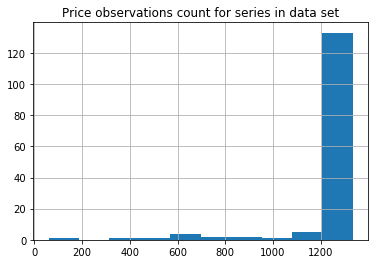

In [31]:
df_obs[['Price']].hist(bins=10)
plt.title("Price observations count for series in data set")

In [34]:
df_obs[['Price', 'MV', 'VA']].sort_values(by=['Price'])

,Price,MV,VA
AWC,59.0,59.0,54.0
OSP,315.0,315.0,294.0
GULF,540.0,540.0,506.0
TOA,581.0,581.0,543.0
PRM,599.0,599.0,561.0
...,...,...,...
ICHI,1335.0,1335.0,1251.0
INTUCH,1335.0,1335.0,1251.0
IRPC,1335.0,1335.0,1251.0
GLOBAL,1335.0,1335.0,1251.0


Text(0.5, 0, 'feature columns (data series)')

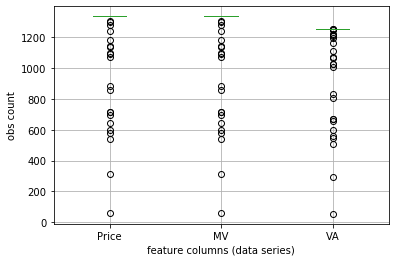

In [48]:
df_obs[['Price','MV','VA']].boxplot()
plt.ylabel('obs count')
plt.xlabel('feature columns (data series)')

In [40]:
# These stocks have data less than 1200 observations
df_obs[df_obs['Price']<=1200] # 17 stocks

,Price,MV,VA
AWC,59.0,59.0,54.0
BCPG,881.0,881.0,829.0
BEM,1072.0,1072.0,1007.0
BGRIM,640.0,640.0,600.0
BPP,859.0,859.0,808.0
COM7,1178.0,1178.0,1107.0
GGC,696.0,696.0,654.0
GULF,540.0,540.0,506.0
JWD,1142.0,1142.0,1072.0
ORI,1136.0,1136.0,1066.0


In [38]:
# These stocks have data less than 1000 observations
df_obs[df_obs['Price']<=1000] # 11 stocks

,Price,MV,VA
AWC,59.0,59.0,54.0
BCPG,881.0,881.0,829.0
BGRIM,640.0,640.0,600.0
BPP,859.0,859.0,808.0
GGC,696.0,696.0,654.0
GULF,540.0,540.0,506.0
OSP,315.0,315.0,294.0
PRM,599.0,599.0,561.0
TOA,581.0,581.0,543.0
TPIPP,715.0,715.0,669.0


In [39]:
# These stocks have data less than 600 observations
df_obs[df_obs['Price']<=600] # 5 stocks

,Price,MV,VA
AWC,59.0,59.0,54.0
GULF,540.0,540.0,506.0
OSP,315.0,315.0,294.0
PRM,599.0,599.0,561.0
TOA,581.0,581.0,543.0


In [41]:
# These stocks have 1335 observations, full-series.

len(df_obs[df_obs['Price']==1335])

129

In [43]:
df_obs[df_obs['Price']<1335]

,Price,MV,VA
AWC,59.0,59.0,54.0
BCPG,881.0,881.0,829.0
BEM,1072.0,1072.0,1007.0
BGRIM,640.0,640.0,600.0
BPP,859.0,859.0,808.0
COM7,1178.0,1178.0,1107.0
GGC,696.0,696.0,654.0
GPSC,1238.0,1238.0,1164.0
GULF,540.0,540.0,506.0
JWD,1142.0,1142.0,1072.0
